In [44]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_and_center_dataset(filename):
    # Your implementation goes here!
    dataset = np.load(filename)
    dataset = dataset.astype(float)
    mean = np.mean(dataset, axis=0)
    centered_dataset = dataset - mean
    return centered_dataset
    # raise NotImplementedError

def get_covariance(dataset):
    # Your implementation goes here!
    n = dataset.shape[0]
    covariance_matrix = np.dot(dataset.T, dataset) / (n - 1)
    return covariance_matrix

def get_eig(S, k):
    # Your implementation goes here!
    eigenvalues, eigenvectors = eigh(S, subset_by_index=[S.shape[0]-k, S.shape[0]-1])
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    Lambda = np.diag(eigenvalues[:k])
    U = eigenvectors[:, :k]
    return Lambda, U

from scipy.linalg import eigh
import numpy as np

def get_eig_prop(S, prop):
    """
    Perform eigendecomposition on the covariance matrix S and return a diagonal matrix
    with the eigenvalues that explain more than a given proportion of the variance,
    along with the corresponding eigenvectors.

    Parameters:
    S (numpy.ndarray): Covariance matrix of shape (d, d).
    prop (float): The proportion of variance to be explained (0 <= prop <= 1).

    Returns:
    Lambda (numpy.ndarray): Diagonal matrix with selected eigenvalues.
    U (numpy.ndarray): Matrix with the corresponding eigenvectors as columns.
    """
    # Compute all eigenvalues and eigenvectors
    eigvals, eigvecs = eigh(S)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Compute total variance and cumulative variance ratio
    total_variance = np.sum(eigvals)
    cumulative_variance_ratio = np.cumsum(eigvals) / total_variance

    # Select eigenvalues and eigenvectors that explain more than 'prop' proportion of variance
    num_selected = np.argmax(cumulative_variance_ratio >= prop) + 1  # Ensure at least one eigenvalue is selected

    # Extract the selected eigenvalues and eigenvectors
    selected_eigvals = eigvals[:num_selected]
    selected_eigvecs = eigvecs[:, :num_selected]

    # Construct diagonal matrix for selected eigenvalues
    Lambda = np.diag(selected_eigvals)

    return Lambda, selected_eigvecs


def project_and_reconstruct_image(image, U):
    # Your implementation goes here!
    alpha = np.dot(U.T, image)
    reconstructed_image = np.dot(U, alpha)
    return reconstructed_image

def display_image(im_orig_fullres, im_orig, im_reconstructed):
    # Reshape im_orig_fullres to (218, 178, 3) for RGB images
    im_orig_fullres = im_orig_fullres.reshape(218, 178, 3)
    
    # Create the figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 3), ncols=3)
    fig.tight_layout()

    # Display the original high-resolution image
    ax1.imshow(im_orig_fullres, aspect='equal')
    ax1.set_title("Original High Res")

    # Display the original low-resolution image
    ax2.imshow(im_orig.reshape(60, 50), cmap='gray', aspect='equal')
    ax2.set_title("Original")
    plt.colorbar(ax2.imshow(im_orig.reshape(60, 50), cmap='gray', aspect='equal'), ax=ax2)

    # Display the reconstructed image
    ax3.imshow(im_reconstructed.reshape(60, 50), cmap='gray', aspect='equal')
    ax3.set_title("Reconstructed")
    plt.colorbar(ax3.imshow(im_reconstructed.reshape(60, 50), cmap='gray', aspect='equal'), ax=ax3)

    return fig, ax1, ax2, ax3

def perturb_image(image, U, sigma):
    # Your implementation goes here!
    alpha = np.dot(U.T, image)
    perturbation = np.random.normal(0, sigma, alpha.shape)
    perturbed_alpha = alpha + perturbation
    perturbed_image = np.dot(U, perturbed_alpha)
    return perturbed_image

In [46]:
# Load and center the dataset
X = load_and_center_dataset('celeba_60x50.npy')
    
    # Compute the covariance matrix
S = get_covariance(X)
    
    # Test get_eig_prop with a proportion of 0.07
Lambda, U = get_eig_prop(S, 0.07)
    
    # Print the results
print("Eigenvalues (Lambda):")
print(Lambda)
print("\nEigenvectors (U):")
print(U)
    
    # Verify the cumulative variance
total_variance = np.sum(np.diag(Lambda))
print("\nTotal variance explained by selected eigenvalues:", total_variance)

Eigenvalues (Lambda):
[[4635329.67030614]]

Eigenvectors (U):
[[-0.03341778]
 [-0.03239126]
 [-0.03307422]
 ...
 [-0.00877291]
 [-0.00931975]
 [-0.0114543 ]]

Total variance explained by selected eigenvalues: 4635329.670306136


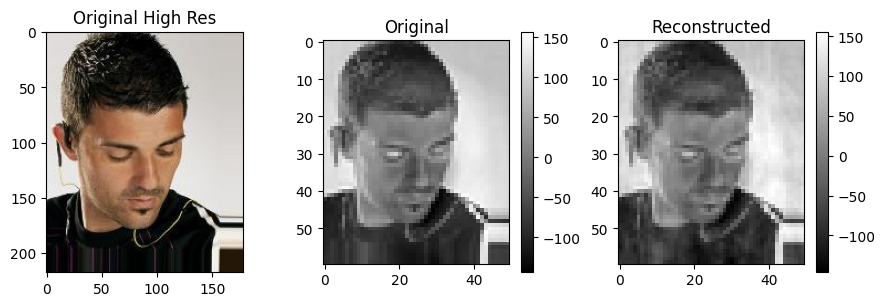

In [47]:
X = load_and_center_dataset('celeba_60x50.npy')
S = get_covariance(X)
Lambda, U = get_eig(S, 50)
celeb_idx = 13  # try out different indices to choose your favorite celebrity!
x = X[celeb_idx]
x_fullres = np.load('celeba_218x178x3.npy')[celeb_idx]
reconstructed = project_and_reconstruct_image(x, U)
fig, ax1, ax2, ax3 = display_image(x_fullres, x, reconstructed)
plt.show()

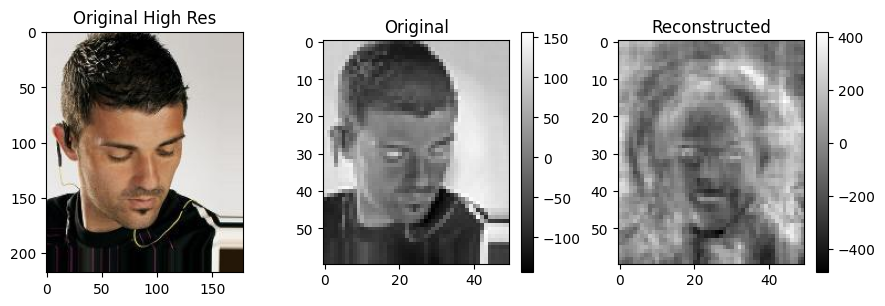

In [48]:
x_perturbed = perturb_image(x, U, sigma=1000)
fig, ax1, ax2, ax3 = display_image(x_fullres, x, x_perturbed)
plt.show()